In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape

(569, 30)

In [9]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [20]:
data.target.shape

(569,)

In [12]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
data.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
N,D = X_train.shape

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

print('train score :',model.evaluate(X_train,y_train))
print('test score  :',model.evaluate(X_test,y_test))


Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.7694 - accuracy: 0.5066 - val_loss: 0.7571 - val_accuracy: 0.5691
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.6063 - val_loss: 0.6823 - val_accuracy: 0.6383
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6745 - val_loss: 0.6171 - val_accuracy: 0.6915
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7297 - val_loss: 0.5603 - val_accuracy: 0.7766
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7717 - val_loss: 0.5134 - val_accuracy: 0.8138
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.8084 - val_loss: 0.4740 - val_accuracy: 0.8404
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8425 - val_loss: 0.4405 - val_accuracy: 0.8617
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.9764 - val_loss: 0.1464 - val_accuracy: 0.9628
Epoch 60/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1114 - accuracy: 0.9764 - val_loss: 0.1455 - val_accuracy: 0.9628
Epoch 61/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9764 - val_loss: 0.1446 - val_accuracy: 0.9628
Epoch 62/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1092 - accuracy: 0.9764 - val_loss: 0.1437 - val_accuracy: 0.9628
Epoch 63/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1082 - accuracy: 0.9764 - val_loss: 0.1429 - val_accuracy: 0.9628
Epoch 64/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9764 - val_loss: 0.1422 - val_accuracy: 0.9628
Epoch 65/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9790 - val_loss: 0.1414 - val_accuracy: 0.9628
Epoch 

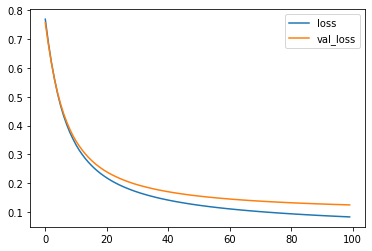

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss') # training loss
plt.plot(r.history['val_loss'],label='val_loss') # validation loss
plt.legend()

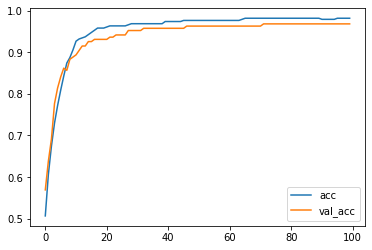

In [35]:
plt.plot(r.history['accuracy'],label='acc')  # training accuracy
plt.plot(r.history['val_accuracy'],label='val_acc')  # validation accuracy
plt.legend()

# Making Predictions

In [40]:
p = model.predict(X_test)
print(p)

[[8.84361289e-05]
 [7.42801967e-06]
 [9.89248991e-01]
 [9.98649240e-01]
 [9.96853471e-01]
 [9.94040132e-01]
 [5.38318157e-02]
 [9.98764515e-01]
 [9.88154948e-01]
 [8.26467752e-01]
 [2.16535896e-01]
 [2.20480561e-03]
 [6.48981333e-03]
 [9.93514717e-01]
 [9.95665550e-01]
 [9.98935223e-01]
 [6.86105907e-01]
 [4.96686697e-02]
 [9.70290184e-01]
 [9.62521851e-01]
 [7.38224387e-03]
 [5.88664007e-05]
 [9.92422462e-01]
 [5.47349453e-04]
 [9.64599609e-01]
 [9.98284578e-01]
 [9.98867095e-01]
 [4.68879938e-04]
 [9.92991865e-01]
 [9.96869087e-01]
 [4.80815351e-01]
 [9.96527970e-01]
 [1.00873141e-08]
 [9.72766995e-01]
 [6.07034564e-03]
 [4.38284278e-02]
 [9.69805956e-01]
 [3.36438417e-04]
 [2.23486859e-05]
 [9.26220775e-01]
 [4.24239248e-01]
 [9.07976151e-01]
 [9.93999958e-01]
 [2.32639313e-02]
 [9.97942924e-01]
 [9.78320479e-01]
 [9.91104007e-01]
 [9.61554527e-01]
 [2.86591949e-05]
 [4.54635799e-01]
 [9.93536234e-01]
 [8.18709671e-01]
 [1.19616985e-02]
 [1.01327896e-03]
 [9.97832775e-01]
 [9.970375

In [43]:
# round to get actual predictions
# Note : has to be flattened since the targets are size(N,) while the predictions are size(N,1)
p = model.predict(X_test)
p = np.round(p).flatten()
print(p)

[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [45]:
# calculate the accuracy , campare it to evaluate() output
print('\nmanual calculated accuracy',np.mean(p == y_test))
print('\nEvaluate output',model.evaluate(X_test,y_test))


manual calculated accuracy 0.9680851063829787
6/6 [==============================] - 0s 601us/step - loss: 0.1242 - accuracy: 0.9681

Evaluate output [0.12420634925365448, 0.9680851101875305]


In [46]:
# Saving and Loading a Model
model.save('linearclassifier.h5')

In [48]:
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1242 - accuracy: 0.9681


[0.12420634925365448, 0.9680851101875305]